# Lecture 4: Logistic Regression

In this section, we will dive deeper into **logistic regression**, building on our understanding of regression models from the previous lecture. The focus will be on applying logistic regression to binary classification tasks, evaluating model performance, and exploring the use of multiple predictors. We will also discuss important concepts such as decision boundaries, and performance metrics like False Positive Rate (FPR) and False Negative Rate (FNR).

### Importing Packages

Before starting, we will import the necessary libraries required for performing logistic regression, visualization, and evaluation. Keeping the imports at the beginning of the notebook helps to maintain clarity and structure as we progress through the different tasks in this lab.


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\cfang\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading the Data

In this section, we will load the **Default dataset** from the **ISLR** package, which contains information about whether an individual defaulted on their credit, their income, balance, and whether they are a student. This dataset will be used to demonstrate logistic regression.

We will use the following variables:
- **default**: Whether the person defaulted (Yes or No)
- **balance**: The person's credit card balance
- **income**: The person's income
- **student**: Whether the person is a student (Yes or No)

We will load the dataset using `pandas` and explore the first few rows to get a sense of the structure.

In [ ]:
# Load the Default dataset
default_data = pd.read_csv("C:\Users\cfang\DownloadsDefault.csv")
# Inspect the dataset
default_data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### Linear Regression: Balance vs. Default

We will begin by applying **linear regression** to explore the relationship between an individual's **credit card balance** and whether they **defaulted** on their payment.

In a linear regression model, the goal is to predict the outcome variable (in this case, whether a person defaults or not) using the predictor variable (balance). However, since **default** is a categorical variable (Yes or No), linear regression isn't ideal for this task. Nevertheless, we'll start with linear regression to illustrate its limitations in binary classification.

We will plot the linear fit and discuss why this approach might not be appropriate when the outcome is categoical.


In [ ]:
# Convert the 'default' column to binary (Yes -> 1, No -> 0)
default_data['default_binary'] = (default_data['default'] == 'Yes').astype(int)
default_data.head()

,default,student,balance,income,default_binary
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [ ]:
# Fit the simple linear regression model using smf.ols
model = smf.ols(formula='default_binary ~ balance', data=default_data)
results = model.fit()

# Display a summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         default_binary   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          2.77e-286
Time:                        11:12:29   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0752      0.003    -22.416      0.0

### Plotting the Regression Line

Now that we have fitted the linear regression model, we will plot the **scatter plot** of the data points (balance vs. default) and overlay the **regression line**.

This plot will help us visualize the relationship between an individual's **balance** and the likelihood of defaulting.

The blue points represent the actual data, while the red line shows the **fitted linear regression line**. Notice that while the regression line attempts to model the relationship, linear regression is not ideal for predicting binary outcomes such as default (Yes or No), which we'll discuss further in the logistic regression setion.


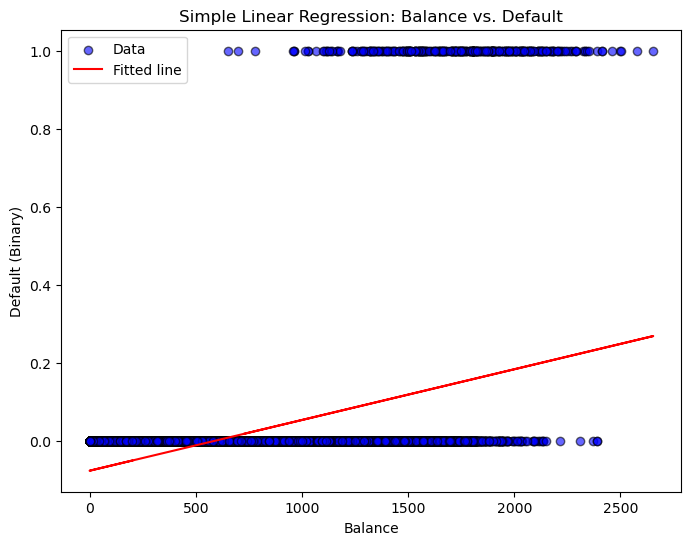

In [ ]:
# Plotting the scatter plot and regression line
plt.figure(figsize=(8, 6))
# Scatter plot with the regression line
plt.scatter(default_data['balance'], default_data['default_binary'], label="Data", color="blue", alpha=0.6, edgecolor='k')
plt.plot(default_data['balance'], results.fittedvalues, color="red", label="Fitted line")
plt.xlabel('Balance')
plt.ylabel('Default (Binary)')
plt.title('Simple Linear Regression: Balance vs. Default')
plt.legend()
plt.show()

### Why Logistic Regression?

In the previous plot, we observed that the **linear regression model** fits a straight line to the relationship between **balance** and **default**. However, there is a critical issue with this approach when predicting **binary outcomes** like "default" (Yes or No).

As the linear regression line continues beyond the observed values of balance, it can predict values outside the range of 0 and 1, which does not make sense in the context of probabilities. For example, when the balance is less than 500, the fitted \(y\) (predicted default probability) becomes **negative**, which is impossible for a probabilasks.


### Logistic Regression: Modeling Default Probability

To address the limitations of linear regression for binary outcomes, we will now use **logistic regression**. Logistic regression models the relationship between the predictor variable (balance) and the probability that the outcome is 1 (i.e., default = Yes).

The key difference between linear regression and logistic regression is that logistic regression uses the **logistic function (sigmoid function)** to ensure that the predicted probabilities always fall between 0 and 1, making it suitable for classification tasks.

In this section, I will show how to:
1. Generate a **logistic regression model** using the `balance` variable as a predictor.
2. Display and interpret the model's **coefficients** to understand the relationship between balance and the likelihood of defaulting.


In [ ]:
# Prepare the data
X = default_data[['balance']].values
y = default_data[['default_binary']].values

# Add a constant (intercept) to the predictor variables
X_with_const = sm.add_constant(X)  # This adds the intercept (β0)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Display a summary of the logistic regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.4534
Time:                        11:20:57   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
x1             0.0055      0

### Plotting the Logistic Regression Curve

Now that we have fitted the logistic regression model, we will plot the **logistic regression curve** to visualize the relationship between **balance** and the probability of defaulting.

- The **blue points** represent the actual data, where each point corresponds to an individual's balance and whether they defaulted.
- The **red curve** represents the logistic regression model's predicted probability of default for various balance values. This curve is the output of the logistic regression model, which transforms the linear relationship into probabilities between 0 and 1 using the **logistic (sigmoid) function**.

This plot allows us to see how the probability of default increases as the balance rises.

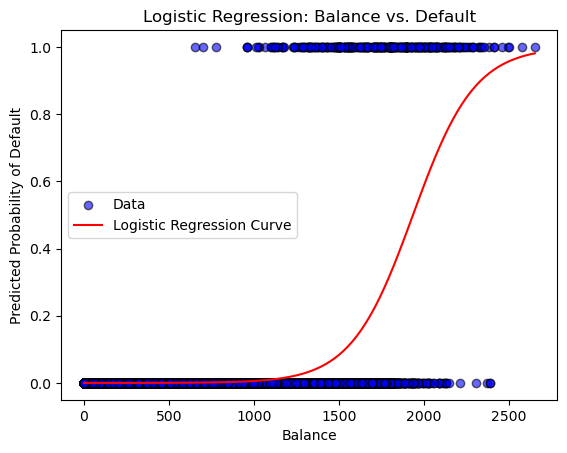

In [ ]:
# Generate values for balance to plot the logistic regression curve
x_vals = np.linspace(X.min(), X.max(), 100)
X_vals_with_const = sm.add_constant(x_vals)
# Predict probabilities for these balance values using the fitted model
y_vals = result.predict(X_vals_with_const)

# Scatter plot for the actual data points
plt.scatter(X, y, label="Data", color="blue", alpha=0.6, edgecolor='k')
# Plot the logistic regression curve
plt.plot(x_vals, y_vals, color="red", label="Logistic Regression Curve")
plt.xlabel('Balance')
plt.ylabel('Predicted Probability of Default')
plt.title('Logistic Regression: Balance vs. Default')
plt.legend()
plt.show()

### Logistic Regression with Multiple Variables

In this section, we will extend our logistic regression model to include additional predictor variables. Besides **balance**, we will also include:
- **income**: The individual's income.
- **student**: Whether the individual is a student (coded as 1 for Yes, 0 for No).

By incorporating multiple variables, we aim to improve the model's predictive power and better understand the factors that contribute to the probability of defaulting.

We will fit the logistic regression model using these three predictors and evaluate the model's coefficients to interpret their impact on the likelihood of defulting.


In [ ]:
# Convert the 'student' column to binary (Yes -> 1, No -> 0)
default_data['student_binary'] = (default_data['student'] == 'Yes').astype(int)
default_data.head()

,default,student,balance,income,default_binary,student_binary
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [ ]:
# Prepare the data with multiple variables: balance, income, and student
X_multi = default_data[['balance', 'income', 'student_binary']]
y = default_data['default_binary']

# Add a constant (intercept) to the predictor variables
X_multi_with_const = sm.add_constant(X_multi)  # This adds the intercept (β0)

# Fit the logistic regression model using statsmodels with multiple variables
logit_model_multi = sm.Logit(y, X_multi_with_const)
result_multi = logit_model_multi.fit()

# Display a summary of the logistic regression results for multiple variables
print(result_multi.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         default_binary   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.4619
Time:                        11:28:08   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance         

### Confusion Matrix with Threshold = 0.5

After fitting the logistic regression model, we can evaluate its performance by calculating the **confusion matrix**. This matrix summarizes the number of:
- **True Positives (TP)**: Correctly predicted defaults (Yes).
- **True Negatives (TN)**: Correctly predicted non-defaults (No).
- **False Positives (FP)**: Incorrectly predicted defaults (predicted Yes but actual No).
- **False Negatives (FN)**: Incorrectly predicted non-defaults (predicted No but actual Yes).

We will use a threshold of **0.5** to convert the predicted probabilities into binary outcomes (default or not).

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict probabilities using the logistic regression model
y_pred_proba = result_multi.predict(X_multi_with_const)

# Apply threshold of 0.5 to get binary predictions (1 if prob >= 0.5, else 0)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[9627   40]
 [ 228  105]]


In [ ]:

# Predict probabilities using the logistic regression model
y_pred_proba_single = result.predict(X_with_const)

# Apply threshold of 0.5 to get binary predictions (1 if prob >= 0.5, else 0)
y_pred_single = (y_pred_proba_single >  0.5).astype(int)

# Calculate confusion matrix
cm_single = confusion_matrix(y, y_pred_single)
print("Confusion Matrix:")
print(cm_single)

Confusion Matrix:
[[9625   42]
 [ 233  100]]


In [ ]:
# Calculate accuracy for completeness
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9732


In [ ]:
# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()
# Calculate False Positive Rate (FPR)
fpr = fp / (fp + tn)
print(f"False Positive Rate (FPR): {fpr:.4f}")
# Calculate False Negative Rate (FNR)
fnr = fn / (fn + tp)
print(f"False Negative Rate (FNR): {fnr:.4f}")

False Positive Rate (FPR): 0.0041
False Negative Rate (FNR): 0.6847


### Logistic Regression on the Iris Dataset

Next, we will apply logistic regression to the well-known **Iris dataset**. The Iris dataset contains measurements of three species of iris flowers: **Iris-setosa**, **Iris-versicolor**, and **Iris-virginica**.

In this example, we will begin by treating the problem as a **binary classification** task by predicting whether a given iris flower is **Iris-setosa** or not. Then, we will move on to a **multi-class classification** problem using the **One-vs-Rest (OvR)** approach.

The predictors (features) are:
- **sepal length**
- **sepal width**

The target variable will initially be whether the flower is Iris-setosa (Yes or No) for binary classification.

In [ ]:
# Load the Default dataset
iris_df = pd.read_csv("C:\Users\cfang\Downloads\iris_dataset.csv")
# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Prepare the features and target
iris_df['is_setosa'] = (iris_df['species']==0).astype(int)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:

# Only use sepal length and sepal width as predictors
X_iris_simple = iris_df[['sepal length (cm)', 'sepal width (cm)']]  # Predictor variables
y_iris_simple = iris_df['is_setosa']  # Binary target (Iris-setosa or not)

# Add a constant (intercept) to the predictor variables
X_iris_simple_with_const = sm.add_constant(X_iris_simple)

# Fit the logistic regression model using statsmodels' sm.Logit
logit_model_simple = sm.Logit(y_iris_simple, X_iris_simple_with_const)
result_simple = logit_model_simple.fit()

# Display the summary of the logistic regression results
print(result_simple.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              is_setosa   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                   1.000
Time:                        11:43:40   Log-Likelihood:            -7.5615e-08
converged:                      False   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 3.426e-42
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               436.7699   5.43e+05      0.001      0.999   -1.06e+06    1.06e+06
sepal length (cm)  -166.7836   2.13e+05     

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Predict probabilities using the logistic regression model
y_pred_proba_single = result_simple.predict(X_iris_simple_with_const)

# Apply threshold of 0.5 to get binary predictions (1 if prob >= 0.5, else 0)
y_pred_single = (y_pred_proba_single >  0.5).astype(int)

# Calculate confusion matrix
cm_single = confusion_matrix(y_iris_simple , y_pred_single)
print("Confusion Matrix:")
print(cm_single)

Confusion Matrix:
[[100   0]
 [  0  50]]


C:\Users\cfang\AppData\Local\Temp\ipykernel_2436\3722757061.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = result_simple.params[0]
C:\Users\cfang\AppData\Local\Temp\ipykernel_2436\3722757061.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -(coef[0] * x + intercept) / coef[1]


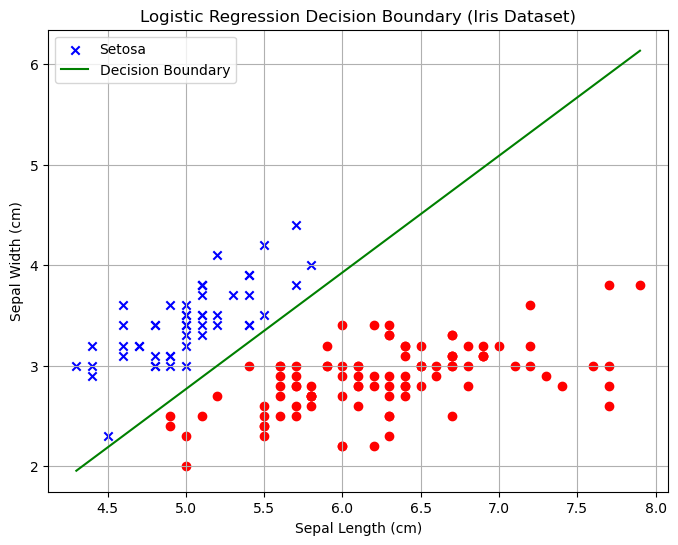

In [ ]:
# Step 5: Extract the coefficients and intercept from the model
intercept = result_simple.params[0]
coef = result_simple.params[1:]

# Define the decision boundary function
def decision_boundary(x):
    return -(coef[0] * x + intercept) / coef[1]

# Step 6: Generate the plot
plt.figure(figsize=(8, 6))

# Scatter plot for sepal length (x1) and sepal width (x2)
for i in range(len(y_iris_simple)):
    if y_iris_simple[i] == 0:
        plt.scatter(X_iris_simple.iloc[i, 0], X_iris_simple.iloc[i, 1], color='red', marker='o', label='Not Setosa' if i == 0 else "")
    else:
        plt.scatter(X_iris_simple.iloc[i, 0], X_iris_simple.iloc[i, 1], color='blue', marker='x', label='Setosa' if i == 0 else "")

# Step 7: Plot decision boundary
x_values = np.linspace(X_iris_simple['sepal length (cm)'].min(), X_iris_simple['sepal length (cm)'].max(), 100)
plt.plot(x_values, decision_boundary(x_values), color='green', label='Decision Boundary')
# Labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression Decision Boundary (Iris Dataset)')
plt.legend()
plt.grid(True)
plt.show()

### Logistic Regression with One-vs-Rest (OvR) without Feature Standardization

In this section, we apply **One-vs-Rest (OvR) logistic regression** to the **Iris dataset** using the original, unstandardized features: **sepal length** and **sepal width**. The OvR strategy trains one binary classifier for each class (Iris-setosa, Iris-versicolor, and Iris-virginica), treating the other two classes as a single "rest" class.

We skip standardizing the features to work with the raw values of sepal length and sepal width in centimeters. Although standardizing features often improves model performance, this example demonstrates how OvR logistic regression performs using the original feature values.

We will visualize the **decision boundaries** that separate the three Iris species in the feature space of sepal length and sepal width, along with a scatter plot of the original data points colored by species.


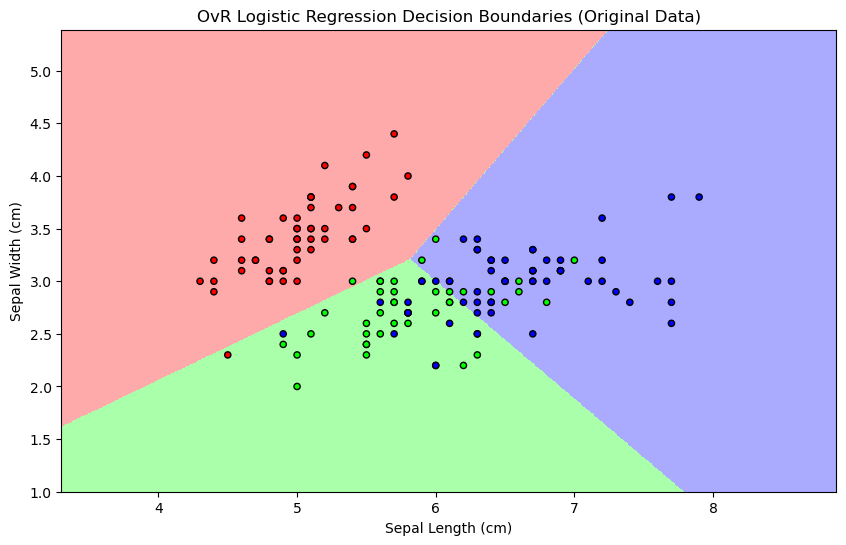

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Only use sepal length and sepal width for simplicity
X = iris_df[['sepal length (cm)', 'sepal width (cm)']].values
y = iris_df['species'].values  # Target (0, 1, 2)

# Step 2: Fit the logistic regression model with OvR (One-vs-Rest)
logit_ovr = LogisticRegression(multi_class='ovr')
logit_ovr.fit(X, y)

# Step 3: Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = logit_ovr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Create a color map for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title('OvR Logistic Regression Decision Boundaries (Original Data)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
# Display the plot
plt.show()